<a href="https://colab.research.google.com/github/Kang-Inprogress/-ML/blob/main/%ED%98%BC%EA%B3%B5ML_8%EC%B1%95%ED%84%B0_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolution Neural Network**

CNN에서...

뉴런 = 필터: 필터처럼 몇 개의 입력만을 가지고 출력을 하나 만들어낸다

필터의 크기 또한 우리가 지정해야 할 하이퍼파라미터이다.

합성곱 계산을 통해 얻은 출력을 특성 맵feature map 이라고 한다.

합성곱 층에 있는 필터(뉴런)의 가중치가 모두 다르기 때문에 특성 맵을 필터 개수만큼 쌓은 차원의 출력이 된다. 특성 맵(2차원) x 필터 개수 => 3차원

출력(특성 맵)이 2차원 형태를 유지하기 때문에:데이터의 공간 특성을 그대로 유지하며 학습하기 때문에 *이미지* 처리 분야에서 뛰어난 성능을 발휘한다. 

In [ ]:
from tensorflow import keras

keras.layers.conv2D(10, kernel_size(3,3), activation="relu") # kernel_size 는 보통 (3,3) 이나 (5,5)가 권장된다.

# 패딩과 스트라이드

(4,4) 크기의 입력을 (3,3)크기의 커널로 합성곱을 했을 때 똑같은 크기의 차원으로 출력으로 하려한다면, 입력을 (6,6)이라고 속이면 될 것이다. 원래 (4,4)만큼의 데이터를 놔두고 나머지를 0값으로 채워 (6,6)을 만드는 기법을 **패딩**이라고 한다.

-> 0으로 채우는데 출력값에 영향을 주지 않는가? 간단히 말하자면 패딩의 역할은 순전히 커널의 합성곱 횟수를 늘려주는 것밖에는 없다. 실제계산에서 0이면 영향이 미치는 일이 없기 때문이다.

+ 0으로 채우는 것을 세임 패딩(same padding). 
+ 순수한 입력 배열에서 합성곱을 하여 특성 맵을 만드는 경우를 밸리드 패딩valid padding이라고 한다.

-> 세임 패딩을 하는 이유? 밸리드 패딩을 사용한다면 자연스레 중간에 있는 값들은 중앙에 있는 커널들과 비교했을 때 참여비율이 차이가 난다. 중요도가 떨어져보이게 되기 때문





In [ ]:
from tensorflow import keras

keras.layers.conv2D(10, kernel_size(3,3), activation="relu", padding="same") # padding을 부여 하지 않으면 자동으로 밸리드 패딩이 된다.

합성곱을 할 때 커널은 한 칸씩 이동했는데 이 경우 **스트라이드**가 1이다. 스트라이드는 strides 속성으로 움직일 칸 수를 직접 조절할 수 있다.

# 풀링 Pooling
합성곱 처럼 입력 위를 지나가면서 수행한다. 풀링에는 가중치가 없기 때문에 최대값이나 평균값을 계산해서 크기를 작게 설정한다.
(n, n) 크기의 풀링에서...

+ 최대 풀링: 해당 차원의 원소에서 가장 큰 값을 출력

+ 평균 풀링: 해당 차원의 원소들의 평균 값을 출력

이동 시 합성곱의 필터와 다른 점은 겹치지 않게 이동한다는 점이다: 풀링 크기 = 스트라이드

In [ ]:
keras.layers.MaxPooling2D(2)

keras.layers.MaxPooling2D(2, strides=2, padding="valid")

**입력 차원이 3차원 이상이라면 필터 또한 그 차원과 해당 차원의 깊이가 같아야한다. 보통 합성곱 층은 3차원을 기대**

필터의 차원이 몇 개이던지 출력은 항상 하나의 값이다.
3차원 입력에서, 필터하나는 1층의 특성 맵을 출력하니까 필터가 n개면 특성 맵의 층도 n개로 이루어 질 것이다.

# 실전: 합성곱 신경망을 사용한 이미지 분류

CNN에서 입력 이미지는 항상 깊이(채널)이 있어야한다. 그러므로 최소 1의 깊이(채널)차원을 추가해 준다.

MNIST 데이터셋

In [15]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/ 255.0 # reshape(-1, 28, 28, 1)로 깊이가 1인 차원을 추가했다
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1))) # 필터(뉴런) 32개, 커널 사이즈(3,3), 활성화함수="relu", 세임패딩
model.add(keras.layers.MaxPooling2D(2)) # (2, 2)풀링으로 절반으로 줄어듦
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               156900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file="cnn-architecture.png", dpi=300)

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 36s 3ms/step - loss: 0.5407 - accuracy: 0.8051 - val_loss: 0.3416 - val_accuracy: 0.8759
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8697 - val_loss: 0.2967 - val_accuracy: 0.8891
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8869 - val_loss: 0.2659 - val_accuracy: 0.9004
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8982 - val_loss: 0.2610 - val_accuracy: 0.9025
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9057 - val_loss: 0.2489 - val_accuracy: 0.9075
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2407 - accuracy: 0.9116 - val_loss: 0.2282 - val_accuracy: 0.9149
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2220 - accuracy: 0.9172 - val_loss: 0.2384 - val_accuracy

In [8]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2325 - accuracy: 0.9190


[0.23247025907039642, 0.9190000295639038]

In [9]:
preds = model.predict(val_scaled[0:1]) # (1, 28, 28, 1) 크기의 데이터 전달
print(preds)  

[[2.0977413e-20 1.4621292e-31 7.2727220e-23 2.5093261e-21 4.7217259e-21
  9.6351951e-23 7.0386224e-22 5.2295823e-22 1.0000000e+00 3.5005407e-24]]


# CNN 시각화


In [5]:
from tensorflow import keras

model = keras.models.load_model("best-cnn-model.h5")
# model.layers

In [9]:
conv = model.layers[0]
print("가중치의 크기: ", conv.weights[0].shape, "| 절편의 크기: ", conv.weights[1].shape) # weight는 파이썬 리스트. 첫 번째 원소: 가중치와 두 번째 원소: 절편의 크기를 알 수 있다.
conv_weights = conv.weights[0].numpy()
print("가중치의 평균값:", conv_weights.mean(), "| 가중치의 표준편차: ", conv_weights.std())

가중치의 크기:  (3, 3, 1, 32) | 절편의 크기:  (32,)
가중치의 평균값: -0.020119244 | 가중치의 표준편차:  0.27198008


**시각화해서 훈련된 모델의 가중치와 그렇지 않은 모델의 가중치를 비교하기**

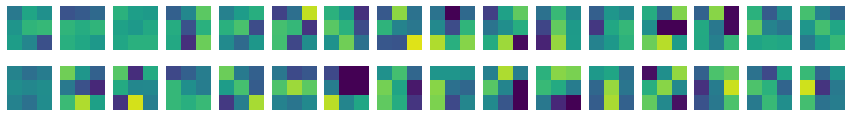

In [10]:
# 눈으로 가중치 확인하기

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5) # conv_weights의 [:, :, :0, 0]부터 [:, :, :0, 31]까지의 커널 출력
    axs[i, j].axis("off")

plt.show()

# 결과값에서 밝은 부분이 가중치가 높은 것이다.

In [12]:
# 입력이 같은 모델 생성(훈련되지않음)
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)))
# no_training_conv = no_training_model.layers[0]
# print(no_training_conv.weights[0].shape)
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0009956631 0.08363045


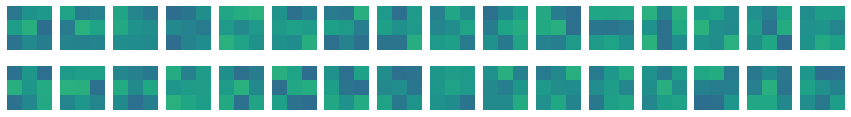

In [13]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")

plt.show()


# 함수형 API로 다시 실습해보기

**밀집층을 재현해보기**

In [2]:
from tensorflow import keras

dense1 = keras.layers.Dense(100, activation="sigmoid")
dense2 = keras.layers.Dense(100, activation="sigmoid")
dense3 = keras.layers.Dense(10, activation="softmax")

inputs = keras.Input(shape=(784, ))

# 변수 = 층(층의 입력)
hidden = dense1(inputs)
hidden2 = dense2(hidden)
outputs = dense3(hidden2)
model = keras.Model(inputs, outputs)

model 객체의 입력과 Conv2D의 출력을 알 수 있다면, 이 둘을 연결하여 새로운 모델을 만드는 것도 가능하다!

InputLayer - Conv2D - Maxpooling2D - Conv2D - Maxpooling2D - Flatten - Dense - Dropout - Dense 함수형 API로 만들기

**특성 맵 시각화**

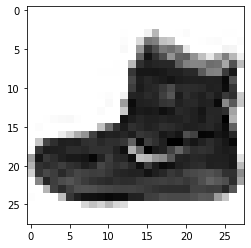

In [3]:
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [12]:
inputs = keras.Input(shape=(None, 28, 28))

conv2d = keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1))
maxpooling2d = keras.layers.MaxPooling2D(2)
dense1 = keras.layers.Dense(100, activation="relu")
dense2 = keras.layers.Dense(10, activation="softmax")

hiddenConv1 = conv2d(inputs)
hiddenPooling1 = maxpooling2d(hiddenConv1)
hiddenConv2 = keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same")(hiddenPooling1)
hiddenPooling2 = maxpooling2d(hiddenConv2)
hiddenFlatten = keras.layers.Flatten()(hiddenPooling2)
hiddenDense = dense1(hiddenFlatten)
outputs = dense2(hiddenDense)

model = keras.Model(inputs, outputs)




ValueError: ignored

(1, 28, 28, 32)


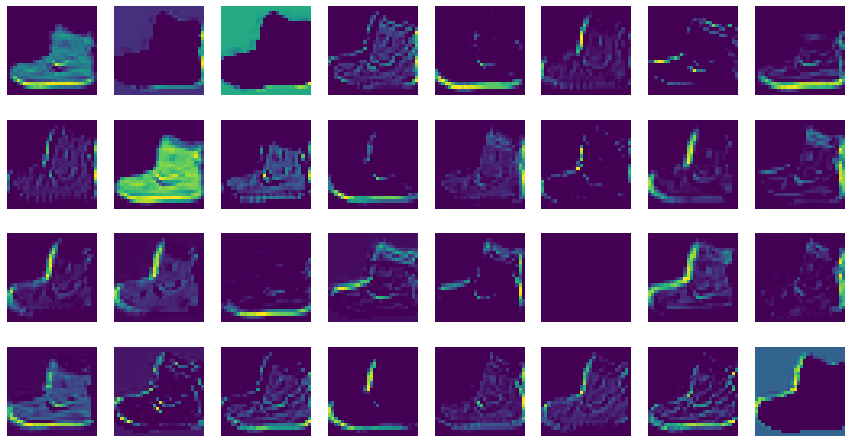

In [21]:
# model = keras.models.load_model("best-cnn-model.h5")

conv_acti = keras.Model(model.input, model.layers[0].output) # model.layers[0] = Conv2D. 첫번째 합성곱

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis("off")
plt.show()

(1, 14, 14, 32)


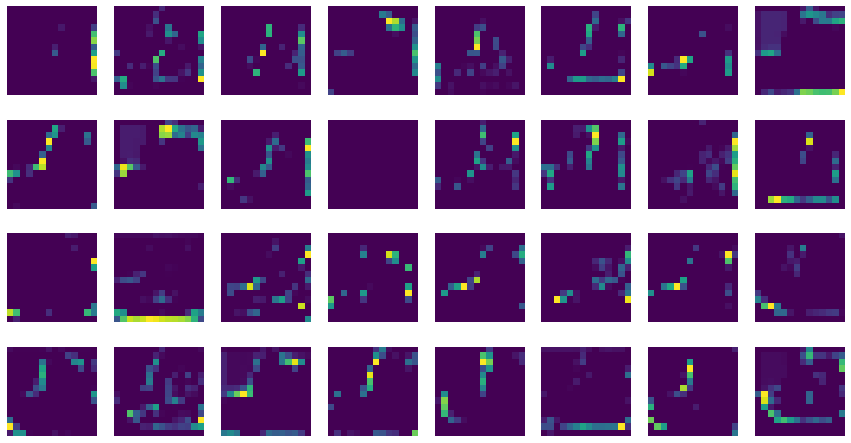

In [26]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis("off")
plt.show()